# Basic operations

In [1]:
%run ../setup.ipynb

## Addition and subtraction

If we have two complex numbers $\red{a} + \mathrm{j}\purple{b}$ and $\red{c} + \mathrm{j}\purple{d}$, their sum is defined by independently summing the real parts ($\red{a+c}$) and the imaginary parts ($\purple{b+d}$):

```{math}
(\red{a} + \mathrm{j}\purple{b}) + (\red{c} + \mathrm{j}\purple{d}) = (\red{a+c}) + \mathrm{j}(\purple{b+d}).
```

Subtraction works similarly:

```{math}
(\red{a} + \mathrm{j}\purple{b}) - (\red{c} + \mathrm{j}\purple{d}) = (\red{a-c}) + \mathrm{j}(\purple{b-d}).
```

In the complex plane, addition and subtraction can be thought of as displacement.
If you imagine drawing an arrows from the origin $0$ to the positions of $z$ and $w$, then you can find the position of $z+w$ by picking up one of the arrows and moving its tail to coincide with the head of the other arrow.
Subtraction works the same way, except that you would turn the arrow around $180^\circ$.

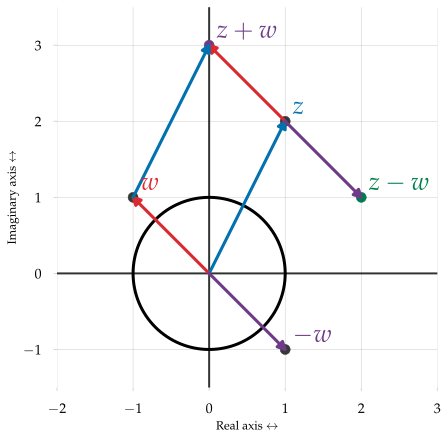

In [4]:
fig, ax = plt.subplots(figsize=figaspect(0.75))
ax.scatter(1, 2, color=colors[3], label=r'$z$', s=100)
ax.text(1.1, 2.1, r'$z$', color=colors[0], size=25)
ax.arrow(0, 0, 1, 2, linewidth=3, head_width=0.1,
           head_length=0.1, fc=colors[0], ec=colors[0], length_includes_head=True)

ax.scatter(-1, 1, color=colors[3], label=r'$w$', s=100)
ax.text(-.9, 1.1, r'$w$', color=colors[1], size=25)
ax.arrow(0, 0, -1, 1, linewidth=3, head_width=0.1,
           head_length=0.1, fc=colors[1], ec=colors[1], length_includes_head=True)

ax.scatter(1, -1, color=colors[3], label=r'$-w$', s=100)
ax.text(1.1, -0.9, r'$-w$', color=colors[4], size=25)
ax.arrow(0, 0, 1, -1, linewidth=3, head_width=0.1,
           head_length=0.1, fc=colors[4], ec=colors[4], length_includes_head=True)

ax.scatter(0, 3, color=colors[4], label=r'$z+w$', s=100)
ax.text(0.1, 3.1, r'$z+w$', color=colors[4], size=25)
ax.plot([-1, 0], [1, 3], color=colors[0], linewidth=2, linestyle=':', zorder=-1)
ax.arrow(1, 2, -1, 1, linewidth=3, head_width=0.1,
           head_length=0.1, fc=colors[1], ec=colors[1], length_includes_head=True)
ax.arrow(-1, 1, 1, 2, linewidth=3, head_width=0.1,
           head_length=0.1, fc=colors[0], ec=colors[0], length_includes_head=True)

ax.scatter(2, 1, color=colors[5], label=r'$z-w$', s=100)
ax.text(2.1, 1.1, r'$z-w$', color=colors[5], size=25)

ax.arrow(1, 2, 1, -1, linewidth=3, head_width=0.1,
           head_length=0.1, fc=colors[4], ec=colors[4], length_includes_head=True)
circ = patches.Ellipse((0, 0), 2, 2, edgecolor='k', linewidth=3, fill=False, zorder=-1)
ax.add_artist(circ)
ax.axhline(0, color=colors[3], zorder=-1, linewidth=2)
ax.axvline(0, color=colors[3], zorder=-1, linewidth=2)

ax.set_xlim(-2, 3)
ax.set_ylim(-1.5, 3.5)
ax.set_aspect('equal')
ax.set_xlabel(r'Real axis $\leftrightarrow$')
ax.set_ylabel(r'Imaginary axis  $\leftrightarrow$');
glue('zadd', fig, display=False)

```{glue:figure} zadd
Addition or subtraction of complex numbers results in translation (shifting) in the plane.
```

## Conjugation

Complex numbers have a new operation, which doesn't exist for other systems like reals and integers, called *conjugation*.
The complex conjugate of a number $z = \red{a} + \mathrm{j}\purple{b}$, denoted as $\overline{z}$, is computed by negating *only the imaginary part*, and is denoted by an over-line:

```{math}
\overline{z} = \overline{\red{a} + \mathrm{j}\purple{b}} = \red{a} - \mathrm{j}\purple{b}.
```

Visually, this operation reflects a point across the horizontal (real) axis in the complex plane, as seen below.

Conjugating a number twice reverts back to the original number (just like negating a number twice).

If a number is purely real (has $\purple{b=0}$), it lies exactly on the horizontal axis, and it is its own conjugate.

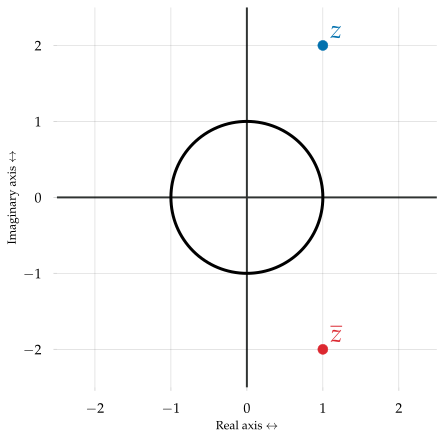

In [5]:
fig, ax = plt.subplots(figsize=figaspect(0.75))

ax.scatter(1, 2, color=colors[0], label=r'$z$', s=100)
ax.text(1.1, 2.1, r'$z$', color=colors[0], size=25)


ax.scatter(1, -2, color=colors[1], label=r'$\overline{z}$', s=100)
ax.text(1.1, -1.9, r'$\overline{z}$', color=colors[1], size=25)

ax.axhline(0, color=colors[3], zorder=-1, linewidth=2)
ax.axvline(0, color=colors[3], zorder=-1, linewidth=2)
circ = patches.Ellipse((0, 0), 2, 2, edgecolor='k', linewidth=3, fill=False, zorder=-1)
ax.add_artist(circ)

ax.set_xlim(-2.5, 2.5)
ax.set_ylim(-2.5, 2.5)
ax.set_aspect('equal')
ax.set_xlabel(r'Real axis $\leftrightarrow$')
ax.set_ylabel(r'Imaginary axis  $\leftrightarrow$');
glue('conjugate', fig, display=False)

```{glue:figure} conjugate
Conjugating a complex number $z \rightarrow \overline{z}$ reflects it across the horizontal axis (real number line).
```

## Multiplication (take 1)

There are two ways to think about multiplication of complex numbers, depending on whether we use *rectangular* or *polar* form, which we'll see below.
Both are equally valid, and produce the same results, but sometimes one may be more convenient than the other.
Let's start with the rectangular form.

If we have two complex numbers $z = \red{a} + \mathrm{j}\purple{b}$ and $w = \red{c} + \mathrm{j}\purple{d}$, we can compute their product by using the rules of algebra and remembering that $\mathrm{j}\cdot\mathrm{j} = -1$:

\begin{align*}
z \cdot w &= (\red{a} + \mathrm{j}\purple{b}) \cdot (\red{c} + \mathrm{j}\purple{d}) & \text{Use definitions of } z, w\\
&= \red{a} \cdot \red{c} + \red{a}\cdot \mathrm{j}\purple{d} + \mathrm{j}\purple{b} \cdot \red{c} + \mathrm{j}\purple{b} \cdot \mathrm{j}\purple{d}  & \text{FOIL multiply}\\
&= \red{a \cdot c} +  \mathrm{j}\left(\red{a}\cdot\purple{d} + \purple{b} \cdot \red{c}\right) + \mathrm{j}^2\left(\purple{b \cdot d}\right)  & \text{Pull out imaginary units } \mathrm{j}\\
&= \red{a \cdot c} + \mathrm{j}\left(\red{a}\cdot\purple{d} + \purple{b} \cdot \red{c}\right) - \red{b \cdot d}  & \mathrm{j}^2 = -1\\
&= \left(\red{a \cdot c - b \cdot d}\right) + \mathrm{j}\left( \purple{a \cdot d + b \cdot c}\right) & \text{Collect real and imaginary parts}
\end{align*}

This looks complicated -- and it is!  The key things to take away here are:

1. The product is well-defined, even if the formula is messy;
2. When you multiply two complex numbers, their real and imaginary parts mix together in a non-trivial way;
3. When two purely imaginary numbers are multiplied together, in this case $\mathrm{j}\purple{b} \cdot \mathrm{j}\purple{d}$, the result is *real*: $-\red{b\cdot d}$.

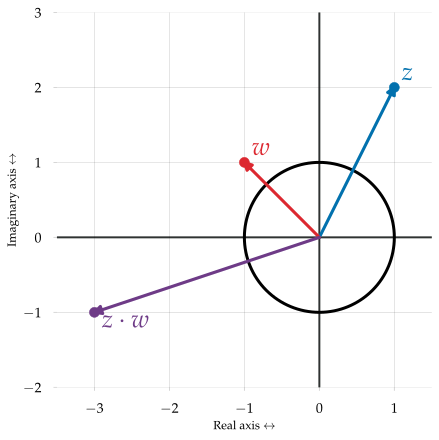

In [6]:
fig, ax = plt.subplots(figsize=figaspect(0.75))
z = 1 + 2j
w = -1 + 1j

zw = z * w

ax.scatter(z.real, z.imag, color=colors[0], label=r'$z$', s=100)
ax.text(z.real+.1, z.imag+.1, r'$z$', color=colors[0], size=25)
ax.arrow(0, 0, z.real, z.imag, linewidth=3, head_width=0.1,
           head_length=0.1, fc=colors[0], ec=colors[0], length_includes_head=True)

ax.scatter(w.real, w.imag, color=colors[1], label=r'$w$', s=100)
ax.text(w.real+.1, w.imag+.1, r'$w$', color=colors[1], size=25)
ax.arrow(0, 0, w.real, w.imag, linewidth=3, head_width=0.1,
           head_length=0.1, fc=colors[1], ec=colors[1], length_includes_head=True)

ax.scatter(zw.real, zw.imag, color=colors[4], label=r'$z\cdot w$', s=100)
ax.text(zw.real+.1, zw.imag-.2, r'$z\cdot w$', color=colors[4], size=25)
ax.arrow(0, 0, zw.real, zw.imag, linewidth=3, head_width=0.1,
           head_length=0.1, fc=colors[4], ec=colors[4], length_includes_head=True)

circ = patches.Ellipse((0, 0), 2, 2, edgecolor='k', linewidth=3, fill=False, zorder=-1)
ax.add_artist(circ)
ax.axhline(0, color=colors[3], zorder=-1, linewidth=2)
ax.axvline(0, color=colors[3], zorder=-1, linewidth=2)

ax.set_xlim(-3.5, 1.5)
ax.set_ylim(-2, 3)
ax.set_aspect('equal')
ax.set_xlabel(r'Real axis $\leftrightarrow$')
ax.set_ylabel(r'Imaginary axis  $\leftrightarrow$');
glue('zmult', fig, display=False)

```{glue:figure} zmult
Complex multiplication implements a scaling and rotation in the complex plane.
```

### Example 1: multiplying complex by reals

Let's keep $z = \red{a} + \mathrm{j}\purple{b}$ and multiply it by a purely real number $\red{x}$.
If we follow the rules above, we get

\begin{align*}
z \cdot \red{x} &= (\red{a} + \mathrm{j}\purple{b}) \cdot \red{x}\\
&= \red{a\cdot x} + \mathrm{j}\purple{b\cdot x}
\end{align*}

so the real $\red{x}$ combines with both the real and imaginary parts of $z$.

### Example 2: multiplying complex by imaginary

What if we multiply $z = \red{a} + \mathrm{j}\purple{b}$ a purely imaginary number $\mathrm{j}\purple{x}$?
In this case, we get

\begin{align*}
z \cdot\mathrm{j} \purple{x} &= (\red{a} + \mathrm{j}\purple{b}) \cdot \mathrm{j}\purple{x}\\
&= \red{a}\cdot \mathrm{j}\purple{x} + \mathrm{j}\purple{b}\cdot \mathrm{j}\purple{x}\\
&=  \red{-b\cdot x} + \mathrm{j}\purple{a\cdot x}.
\end{align*}

In this case, the real and imaginary parts have exchanged places, and the new real part ($\red{b \cdot x}$) has been negated.

### Example 3: multiplying complex by its conjugate

Finally, what if we multiply a number $z = \red{a} + \mathrm{j}\purple{b}$ by its own conjugate $\overline{z} = \red{a} - \mathrm{j}\purple{b}$?

In this case, all of the imaginary components cancel each-other out, and the resulting product is purely real (and non-negative):

\begin{align*}
z \cdot \overline{z} &= (\red{a} + \mathrm{j}\purple{b}) \cdot (\red{a} - \mathrm{j}\purple{b})\\
&= \red{a \cdot a} + \mathrm{j}\purple{b}\cdot \red{a}    - \red{a} \cdot \mathrm{j}\purple{b}   - \mathrm{j}\purple{b}   \cdot \mathrm{j}\purple{b}  & \text{FOIL multiply}\\
&= \red{a \cdot a}+ \cancel{\mathrm{j}\purple{b}\cdot   \red{a}}    - \cancel{\red{a} \cdot \mathrm{j}\purple{b}}   - \mathrm{j}\purple{b}   \cdot \mathrm{j}\purple{b}  & \text{Cancel } -\mathrm{j}ab + \mathrm{j}ab = 0\\
&= \red{a \cdot a} - \mathrm{j}\purple{b}   \cdot \mathrm{j}\purple{b}  & \text{Substitute } \mathrm{j}^2 = -1 \\
&= \red{a^2 + b^2}
\end{align*}

We could say more about complex multiplication, but as we'll see, it's easier to think about if we use the *polar* form.
To see how that works, we'll need to take a slight detour through the exponential function.